In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In this NoteBook we will use our abilities to analyze a dataset and do a little cleaning of it as an exercise, we will be using the pima-indians-diabetes-database for this porpuse.
Our first step is load our dataset and take a look at the first rows of it.

In [2]:
#Load the data to a variable (dataframe)
indian_diabetes_data = pd.read_csv(r'/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
#Prints the first rows of the data set 
print(indian_diabetes_data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


We see that our dataframe has 9 columns but now let's take a look to more descriptive information regarding the data frame using the function info()

In [3]:
# .info() retrieves the information from the data frame, columns, number of entries and data types
print(indian_diabetes_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


We see that we have 768 entries on this dataframe and according to the information all the records had values, let's take a better look at the data frame and it's values by using the function describe()

In [4]:
#Take a look at the values pof each column
print(indian_diabetes_data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

By looking at the it, is clear that there are some odds values, like pregnancies it has a max value of 17 which is a really high. On the other hand when we check the min values we see for some columns the value is 0 which is not possible for such mesures, for example we cannot have 0 BloodPressure, 0 Insulin or 0 Glucose, let's count the number of records that has 0  on the columns with min = 0.

In [5]:
#Look at the number of 0 values on each column 
print((indian_diabetes_data['Glucose'] == 0).sum())
print((indian_diabetes_data['BloodPressure'] == 0).sum())
print((indian_diabetes_data['SkinThickness'] == 0).sum())
print((indian_diabetes_data['Insulin'] == 0).sum())
print((indian_diabetes_data['BMI'] == 0).sum())

5
35
227
374
11


For Glucose, BloodPressure and BMI looks like we don't have so much data lost, but for SkinThickness and Insulin we have over 200 records missing.
Let's try to fix the data by removing the 0 values of it and see if it leave us with enough data to work with.
But first lets take a look to the Outcome and Age columns to see if they don't have strange values on them.

In [6]:
#To see all the values on these columns
print(indian_diabetes_data['Outcome'].unique())
print(indian_diabetes_data['Age'].unique())
print(indian_diabetes_data['Pregnancies'].unique())

[1 0]
[50 31 32 21 33 30 26 29 53 54 34 57 59 51 27 41 43 22 38 60 28 45 35 46
 56 37 48 40 25 24 58 42 44 39 36 23 61 69 62 55 65 47 52 66 49 63 67 72
 81 64 70 68]
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]


Everything looks good for this two columns so we can proceeed with the elimination of the other values to see if it leave us with enough data to work with.

In [7]:
#Change the 0 to NaN so we can use more easily the function dropna()
indian_diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = indian_diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.nan)
#Drop the NaN and save the new dataframe in a variable
dropedna_data = indian_diabetes_data.dropna()
#Print the information again to check the data again
print(dropedna_data.info())
print(dropedna_data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   392.000000  392.000000     392.000000     392.000000  392.000000   
mean      3.301020  122.627551      70.663265      29.145408  156.056122   
std    

After cleaning our data we see that we are left with 392 entries left. We can star our analysis regarding the questions that are asked reagrding this data, for example: What is the ralation between been pregnant and having diabetes (Outcome)?, let's do a visualizacion for this question.

<AxesSubplot:xlabel='Pregnancies'>

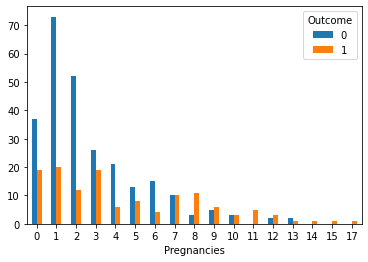

In [8]:
#Plot the number of pregnancies and the ralation with the Outcome 
dropedna_data.groupby([ "Pregnancies", "Outcome",]).size().unstack().plot(kind="bar", rot=0)


As we can see most of the people that were tested are between have had between 0 and 4 pregnancies, but we cannot see a really good relation between these two columns, prehaps it would be better to compare another columns to have a better description of the relation regarding been pregnant and having diabetes.